# Python Ex

**1. Unique crop types in the dataset**

In [1]:
# Importing the necessary libraries
import pandas as pd

# Reading the CSV file into a DataFrame
file_path = 'MD_agric_exam-4313.csv'  # Replace 'your_file_name.csv' with the actual file name
df = pd.read_csv(file_path)

# Displaying the first few rows of the DataFrame to understand the structure
df.head()

# Determining the number of unique crop types
unique_crop_types = df['Crop_type'].nunique()

# Displaying the result
print(f'The number of unique crop types in the dataset is: {unique_crop_types}')


The number of unique crop types in the dataset is: 8


**2. The maximum annual yield for "wheat" crop type in the dataset (rounded to 2 decimal places)**

In [2]:
# Filtering rows where Crop_type is "wheat" and finding the maximum annual yield
max_wheat_yield = df[df['Crop_type'] == 'wheat']['Annual_yield'].max()

# Displaying the result
print(f'The maximum annual yield for "wheat" crop type is: {max_wheat_yield:.2f}')

The maximum annual yield for "wheat" crop type is: 8.99


**3. The total rainfall for crop types where the average pollution level is above 0.2.**

In [3]:
# Filtering rows where the average pollution level is above 0.2
filtered_df = df.groupby('Crop_type').filter(lambda x: x['Pollution_level'].mean() > 0.2)

# Calculating the total rainfall for the filtered crop types
total_rainfall = filtered_df['Rainfall'].sum()

# Displaying the result
print(f'The total rainfall for crop types with average pollution level above 0.2 is: {total_rainfall:.2f}')

The total rainfall for crop types with average pollution level above 0.2 is: 941959.70


**4. A function to calculate the temperature range (Max_temperature_C - Min_temperature_C) for each farmer's field.**

In [4]:
# Function to calculate temperature range for a given Field_ID
def calculate_temperature_range(field_id):
    field_data = df[df['Field_ID'] == field_id]
    if not field_data.empty:
        min_temp = field_data['Min_temperature_C'].values[0]
        max_temp = field_data['Max_temperature_C'].values[0]
        temperature_range = max_temp - min_temp
        return temperature_range
    else:
        return None

# List of Field_ID values to call the function to display example output
field_ids_to_call = [1458, 1895, 5443]

# Calling the function for each Field_ID and displaying the results
for field_id in field_ids_to_call:
    temperature_range = calculate_temperature_range(field_id)
    if temperature_range is not None:
        print(f'Temperature range for Field_ID {field_id}: {temperature_range:.2f}°C')
    else:
        print(f'No data found for Field_ID {field_id}')

Temperature range for Field_ID 1458: 40.70°C
Temperature range for Field_ID 1895: 35.70°C
Temperature range for Field_ID 5443: 33.40°C


**5. Code to calculate the total plot size for plots where the pH is less than 5.5.**

In [5]:
# Filtering rows where pH is less than 5.5 and calculating the total plot size
total_plot_size_low_pH = df[df['pH'] < 5.5]['Plot_size'].sum()

# Displaying the result
print(f'The total plot size for plots with pH less than 5.5 is: {total_plot_size_low_pH:.2f}')

The total plot size for plots with pH less than 5.5 is: 1731.90


**6.  Creating a datafram that includes entries with a 'Min_temperature_C’< -5 and a 'Max_temperature_C' > 30.** 

In [6]:
# Creating a DataFrame with entries satisfying the conditions
filtered_df = df[(df['Min_temperature_C'] < -5) & (df['Max_temperature_C'] > 30)]

# Displaying the first few rows of the filtered DataFrame
print(filtered_df.head())

# Determining the number of rows in the filtered dataset
num_rows_filtered = filtered_df.shape[0]

# Displaying the result
print(f'The number of rows in the filtered dataset is: {num_rows_filtered}')

    Field_ID  Elevation  Rainfall  Min_temperature_C  Max_temperature_C  \
0       1162  494.95615    1507.6               -5.4               31.0   
2       3504  396.87990    1715.1               -6.1               31.7   
5       2274  270.45100    1665.2               -7.2               34.3   
13      4807  520.29770     292.3               -6.3               32.9   
14       973  432.03570    1464.4               -6.0               30.2   

          pH  Pollution_level  Plot_size  Annual_yield Crop_type  
0   6.859436         0.007034        3.6      1.617421    coffee  
2   5.774116         0.000409        2.6      1.262207    banana  
5   5.873082         0.001545        3.9      1.743458    banana  
13  5.379286         0.196589        1.4      0.881568    potato  
14  7.482802         0.019800        3.0      1.377434     wheat  
The number of rows in the filtered dataset is: 319


**7. Using Numpy, to calculate the standard deviation of the 'Rainfall' for plots where the 'Plot_size' is larger than the median plot size of the dataset (rounded to 2 decimal places).**

In [7]:
import numpy as np

# Calculating the median plot size
median_plot_size = df['Plot_size'].median()

# Filtering rows where 'Plot_size' is larger than the median plot size
filtered_df = df[df['Plot_size'] > median_plot_size]

# Calculating the standard deviation of 'Rainfall' for the filtered plots
rainfall_std_dev = np.std(filtered_df['Rainfall'], ddof=1)

# Rounding the result to 2 decimal places
rainfall_std_dev_rounded = round(rainfall_std_dev, 2)

# Displaying the result
print(f'The standard deviation of Rainfall for plots with Plot_size > median plot size is: {rainfall_std_dev_rounded}')

The standard deviation of Rainfall for plots with Plot_size > median plot size is: 470.09


**8. Concatenating the first three digits of the most common ‘Max_temperature_C’ with the last three letters of the least common 'Crop_type', to get a string**

In [8]:
# Finding the most common Max_temperature_C (using the first mode if there are multiple modes)
most_common_max_temp = df['Max_temperature_C'].mode().iloc[0]

# Finding the least common Crop_type
least_common_crop_type = df['Crop_type'].value_counts().idxmin()

# Concatenating the first three digits of the most common Max_temperature_C
# with the last three letters of the least common Crop_type
result_string = str(int(most_common_max_temp))[:3] + least_common_crop_type[-3:]

# Displaying the result
print(f'The concatenated string is: {result_string}')

The concatenated string is: 30ice


**9. Python code to create a violin plot visualising the distribution of 'Annual_yield' across different 'Elevation' ranges. The elevation range categories (Low: < 300m, Medium: 300m - 600m, High: > 600m) to categorise the data before plotting.**

C:\Users\mutsv\AppData\Local\Temp\ipykernel_27584\1428672354.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Elevation_Category', y='Annual_yield', data=df, palette='viridis')


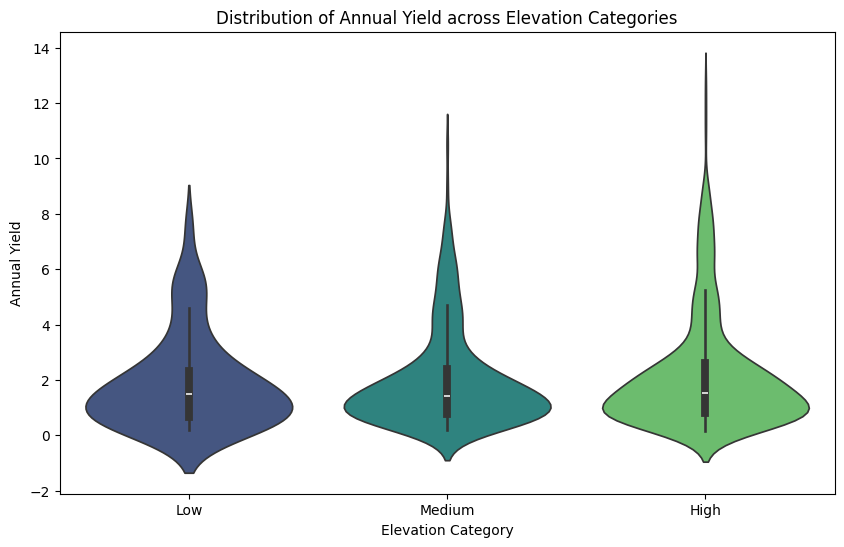

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Categorizing the 'Elevation' ranges
df['Elevation_Category'] = pd.cut(df['Elevation'], bins=[-float('inf'), 300, 600, float('inf')],
                                  labels=['Low', 'Medium', 'High'])

# Creating a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Elevation_Category', y='Annual_yield', data=df, palette='viridis')
plt.title('Distribution of Annual Yield across Elevation Categories')
plt.xlabel('Elevation Category')
plt.ylabel('Annual Yield')
plt.show()

**10. Python code to perform a t-test comparing the average 'Annual_yield' between 'coffee' and 'banana' crop types using scipy.stats.**

In [14]:
from scipy.stats import ttest_ind

# Extracting 'Annual_yield' data for 'coffee' and 'banana'
annual_yield_coffee = df[df['Crop_type'] == 'coffee']['Annual_yield']
annual_yield_banana = df[df['Crop_type'] == 'banana']['Annual_yield']

# Performing t-test
t_statistic, p_value = ttest_ind(annual_yield_coffee, annual_yield_banana, equal_var=False)

# Rounding the p-value to three decimal places
rounded_p_value = round(p_value, 3)

# Displaying the result
print(f'The p-value for the t-test is: {rounded_p_value}')

The p-value for the t-test is: 0.598
